In [46]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats as stats

Esta parte do trabalho tem como objetivo realizar uma análise rápida das informações sobre as salas comerciais à venda em Florianópolis pelo site Chaves na Mão. Cada etapa foi apresentada no notebook de forma resumida, de maneira a transmitir a ideia geral de como proceder em uma análise e, ao mesmo tempo, ser o mais conciso possível.

  1.  A primeira parte trata dos metadados, na qual foram excluídas as informações que aparentavam estar incorretas.

  2.   Na análise exploratória, mostrei como fazer uma exploração rápida usando a localização geográfica de cada região. Em seguida, realizei o teste de Tukey com o preço médio de um cluster de bairros próximos ao centro. O objetivo foi verificar se há uma diferença média nos valores médios de preço por metro quadrado desses bairros.

  3.   Na terceira parte, aproveitei os 6 bairros com maior número de instâncias para realizar uma regressão linear. Também aproveitei o fato de que o bairro do Saco Grande tem um preço por metro quadrado médio diferente dos outros bairros, para criar uma variável Dummy.

Foi descoberto que o preço por metro quadrado mais caro pertence ao bairro de Jurerê Internacional(30494.949), assim como o mais barato pertence à Tapera (1392.857). Essa descoberta é particular a esses dados. Para uma análise estatística mais robusta, seria necessário um teste com intervalos de confiança para cada bairro. No entanto, como o número de instâncias por bairro é limitado e o código ficaria muito extenso, optei por não fazê-lo. Apesar disso, é plausível pensar que o preço por metro quadrado em Jurerê Internacional seja o mais alto, dada a fama da região.

Na parte de regressão, optei por uma regressão linear dos 6 bairros com maior número de instâncias no conjunto de dados. Escolhi apenas 6 bairros porque, a cada bairro adicionado, haveria uma perda de graus de liberdade. os Seis bairros são:  Centro, Trindade, Itacorubi, Estreito, Saco Grande e Agronômica

A regressão mostrou que o aumento de 1 metro quadrado faz o preço do imóvel subir cerca de 7500 reais. Também mostrou que, em média, os imóveis do Saco Grande são 356.300 reais mais caros do que os outros analisados.

Esses resultados podem ser afetados pelo fato de os resíduos não serem homocedásticos ou não normais. Uma regressão robusta poderia resolver o problema, ou a troca de variáveis. No entanto, para manter o resumo sucinto, optei por apresentar apenas as recomendações.

In [47]:
data = pd.read_excel(r"C:\Users\joao\Desktop\imoveis\dataframe_pronto.xlsx")

In [48]:
data2 = data.copy()

In [49]:
data

,m2,salas,banheiros,garagens,preço,condominio,bairro,endereço,descrição,latitude,longitude,bairro_latitude,bairro_longitude
0,38,0,1,1,650000,992,Centro,"Rua Dom Jaime Câmara, 170",Venda | sala comercial,-27.593,-48.551,-27.597,-48.549
1,30,0,1,0,244800,107,Itacorubi,"Rua Pastor William Richard Schisler Filho, --","Sala comercia no itacorubi com 42,86m2",-27.577,-48.507,-27.582,-48.504
2,29,1,1,1,160000,500,Estreito,"Rua Almirante Lucas Boiteux, 40",Sala comercial - estreito,NaN,NaN,-27.591,-48.578
3,745,0,5,3,2100000,0,Trindade,Servid&#xe3;o Jos&#xe9; Ventura,"Pr&#xe9;dio &#xe0; venda, 745 m&#xb2; por r$ 2...",NaN,NaN,-27.589,-48.522
4,27,0,1,0,186000,370,Trindade,"Rua Cônego Bernardo, 101",Sala à venda no bairro trindade - florianópoli...,-27.595,-48.520,-27.589,-48.522
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1409,59,0,1,0,645657,709,Centro,"Rua Emílio Blum, 131","Centro comercial ars - salas de 92,10 m² no ce...",-27.593,-48.545,-27.597,-48.549
1410,33,0,0,0,250000,350,Centro,"Avenida Rio Branco, 817","Sala comercial à venda, saco grande, florianóp...",-27.591,-48.550,-27.597,-48.549
1411,295,0,4,0,1600000,3229,Centro,Praça Xv De Novembro,Salas comerciais à venda nos bairros de Floria...,-27.598,-48.550,-27.597,-48.549
1412,41,0,1,0,488246,536,Centro,Endereço não disponível,Sala à venda em estreito florianópolis,NaN,NaN,-27.597,-48.549


# Análise de metadados

In [50]:
#quantidade de instâncias nulas
data.isnull().sum()

m2                    0
salas                 0
banheiros             0
garagens              0
preço                 0
condominio            0
bairro                0
endereço              0
descrição             0
latitude            343
longitude           343
bairro_latitude       0
bairro_longitude      0
dtype: int64

In [51]:
#descrição
data.describe()

,m2,salas,banheiros,garagens,preço,condominio,latitude,longitude,bairro_latitude,bairro_longitude
count,1414.000,1414.000,1414.000,1414.000,1414.000,1414.000,1071.000,1071.000,1414.000,1414.000
mean,87.274,0.438,1.233,0.931,729442.914,569.472,-27.583,-48.539,-27.583,-48.534
std,119.414,2.002,1.498,2.990,1070466.016,721.948,0.035,0.034,0.042,0.040
min,1.000,0.000,0.000,0.000,1600.000,0.000,-27.778,-48.627,-27.788,-48.594
25%,33.000,0.000,1.000,0.000,268000.000,225.250,-27.596,-48.553,-27.597,-48.549
50%,45.000,0.000,1.000,0.000,380000.000,400.000,-27.592,-48.550,-27.597,-48.549
75%,76.750,0.000,1.000,1.000,679000.000,652.750,-27.584,-48.521,-27.587,-48.522
max,984.000,33.000,18.000,82.000,15000000.000,6833.000,-27.397,-48.380,-27.389,-48.364


Já na descrição podemos ver que há indícios de algumas instancias problematicas. No m², por exemplo, há uma instancia com valor de 1 m²; também há uma instancia com preço de 1600.

Vamos procurar essas instancias problematicas

In [52]:
data[data['m2'] < 20]

,m2,salas,banheiros,garagens,preço,condominio,bairro,endereço,descrição,latitude,longitude,bairro_latitude,bairro_longitude
34,18,1,3,0,400000,250,Ingleses do Rio Vermelho,"Rua Intendente João Nunes Vieira, 1715","Sala comercial à venda no saco grande, florian...",-27.436,-48.392,-27.440,-48.401
61,1,0,1,1,699000,1000,Centro,"Rua Adolfo Melo, --","Sala comercial à venda no centro, florianópoli...",-27.593,-48.552,-27.597,-48.549
190,18,0,1,0,155000,300,Centro,"Rua Felipe Schmidt, 303","Sala comercial à venda, centro, florianópolis ...",-27.597,-48.552,-27.597,-48.549
254,18,1,0,0,379000,120,Ingleses do Rio Vermelho,"Rua Intendente João Nunes Vieira, 1715","Sala comercial à venda na rua josé brognoli, 1...",-27.436,-48.392,-27.440,-48.401
488,19,0,1,0,170000,295,Centro,Rua Felipe Schmidt,"Sala comercial à venda na rua santos dumont, 0...",-27.591,-48.561,-27.597,-48.549
612,18,0,1,0,170000,286,Centro,Rua Felipe Schmidt,"Sala comercial para venda em florianópolis, jo...",-27.592,-48.560,-27.597,-48.549
618,17,0,1,0,170000,280,Centro,Rua Felipe Schmidt,Salas comerciais à venda nos bairros de Floria...,-27.592,-48.560,-27.597,-48.549
636,12,0,1,1,426990,0,Estreito,"Rua Fúlvio Aducci, 627",Exclusivo - sala comercial de 28m² no estreito.,-27.587,-48.578,-27.591,-48.578
984,14,0,1,1,550000,299,Centro,Endereço não disponível,Sala em centro - florianópolis,NaN,NaN,-27.597,-48.549


vamos excluir a instancia com index 61, com o m² igual a 1

In [53]:
data = data[~(data['m2'] == 1)]

vamos explorar agora os valores dos preços

In [54]:
data[data['preço'] < 100000]

,m2,salas,banheiros,garagens,preço,condominio,bairro,endereço,descrição,latitude,longitude,bairro_latitude,bairro_longitude
811,27,0,1,0,98000,317,Centro,"Rua Conselheiro Mafra, 426",No coração de centro de florianópolis codigo: ...,-27.594,-48.559,-27.597,-48.549
1350,45,0,1,0,1600,345,Centro,"Rua Anita Garibaldi, 77",Sala comercial em andar alto no centro - á ven...,-27.598,-48.545,-27.597,-48.549


a instancia 1350 apresenta um possível problema. O preço de 1600, provavelmente, foi colocado pelo anuciante como o preço do aluguel e não do imóvel. Até porque o segundo menor preço é da instancia 811, sendo 98 mil. Vamos remover a instancia 1350

In [55]:
data = data[~(data['preço'] < 2000)]

# Análise exploratória

Antes de começar a análise gráfica, vamos criar uma nova coluna com os valores de preço/m², isso irá normatizar o preço para uma análise mais sólida dos preços por bairro

In [56]:
data['precopm2'] = data['preço']/data['m2']

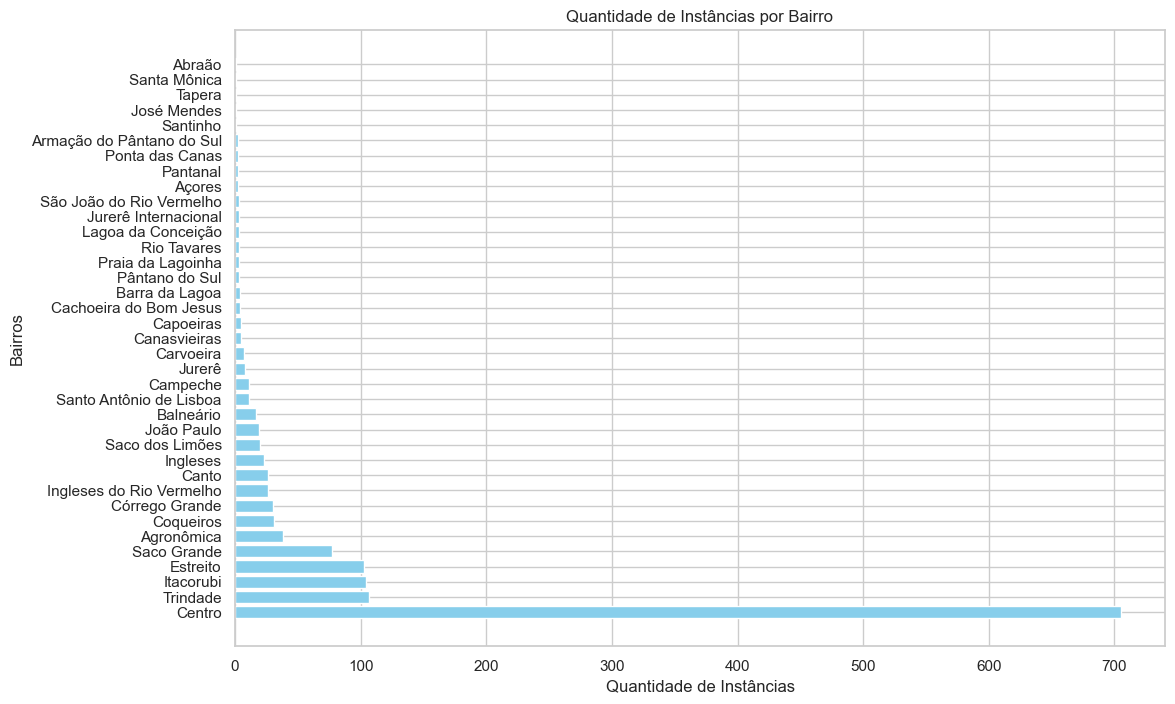

In [57]:
plt.figure(figsize=(12, 8))
plt.barh(data['bairro'].value_counts().index, data['bairro'].value_counts().values, color='skyblue') 
plt.xlabel('Quantidade de Instâncias')
plt.ylabel('Bairros')
plt.title('Quantidade de Instâncias por Bairro')

plt.show()

Como visto, a maioria das instancia se encontram no centro, isso pode criar um viés de amostra desbalanceada para uma regressão. Vamos explorar o valor médio do m² por bairro

In [58]:
data2cor = data2.groupby('bairro')[['bairro_latitude' ,  'bairro_longitude']].mean()

In [59]:
data2cor['preçom2pbairro'] = data.groupby('bairro')['precopm2'].mean().values

In [60]:
data2cor['preçom2pbairro'].sort_values()

bairro
Tapera                       1392.857
Ponta das Canas              5581.570
Capoeiras                    6199.053
Pantanal                     6673.426
José Mendes                  6790.123
Saco dos Limões              6924.916
Armação do Pântano do Sul    6966.667
Pântano do Sul               6989.689
Cachoeira do Bom Jesus       7055.839
Santinho                     7697.368
Trindade                     7730.451
Coqueiros                    7782.441
São João do Rio Vermelho     7830.556
Córrego Grande               8338.255
Itacorubi                    8509.469
Ingleses                     8520.040
Agronômica                   8789.653
Praia da Lagoinha            8827.951
Açores                       8936.427
Centro                       8941.120
Balneário                    9136.458
Estreito                     9394.456
Canto                        9400.326
Barra da Lagoa               9670.352
Ingleses do Rio Vermelho     9678.512
Santa Mônica                10233.918
Jurer

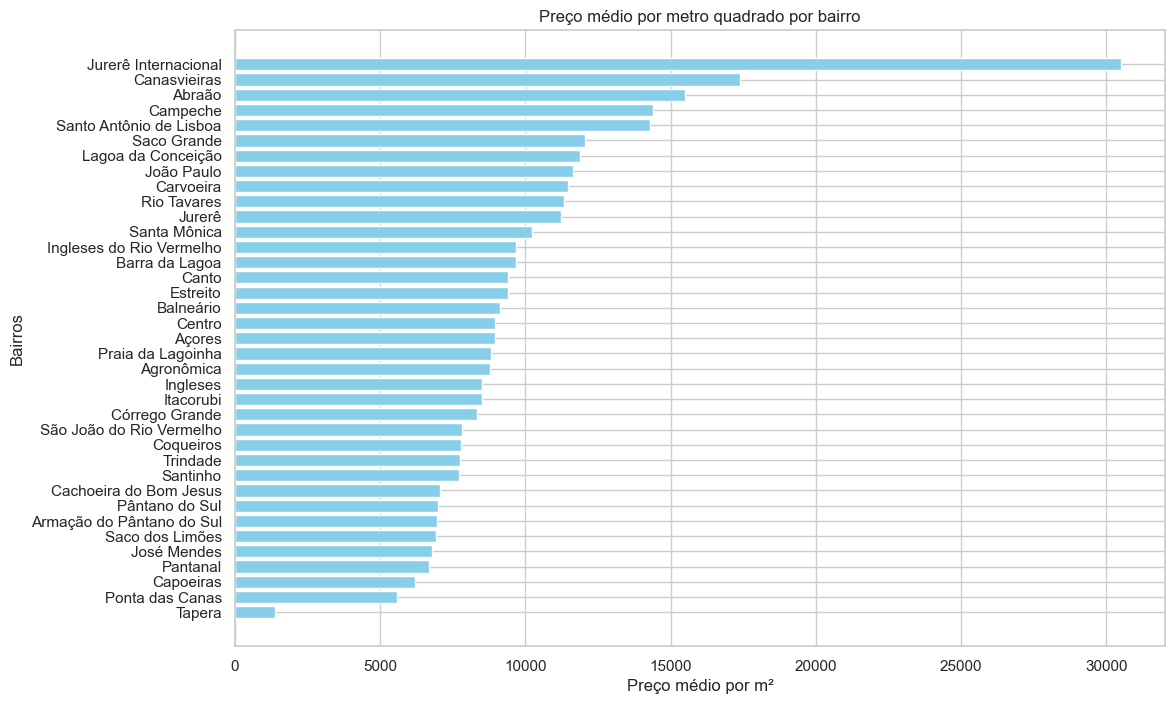

In [61]:
bairros = data2cor['preçom2pbairro'].sort_values(ascending=False).index
valores = data2cor['preçom2pbairro'].sort_values(ascending=False).values

plt.figure(figsize=(12, 8))
plt.barh(bairros, valores, color='skyblue')
plt.xlabel('Preço médio por m²')
plt.ylabel('Bairros')
plt.title('Preço médio por metro quadrado por bairro')
plt.gca().invert_yaxis()  
plt.show()

Retirando o valor médio por m² de Jurerê Internacional e da Tapera que correspondem as valores máximos e minimos respectivamente para não atrapalhar a análise gráfica.

In [62]:
 data2cor = data2cor[~(data2cor.index == 'Jurerê Internacional')]
data2cor = data2cor[~(data2cor.index == 'Tapera')]

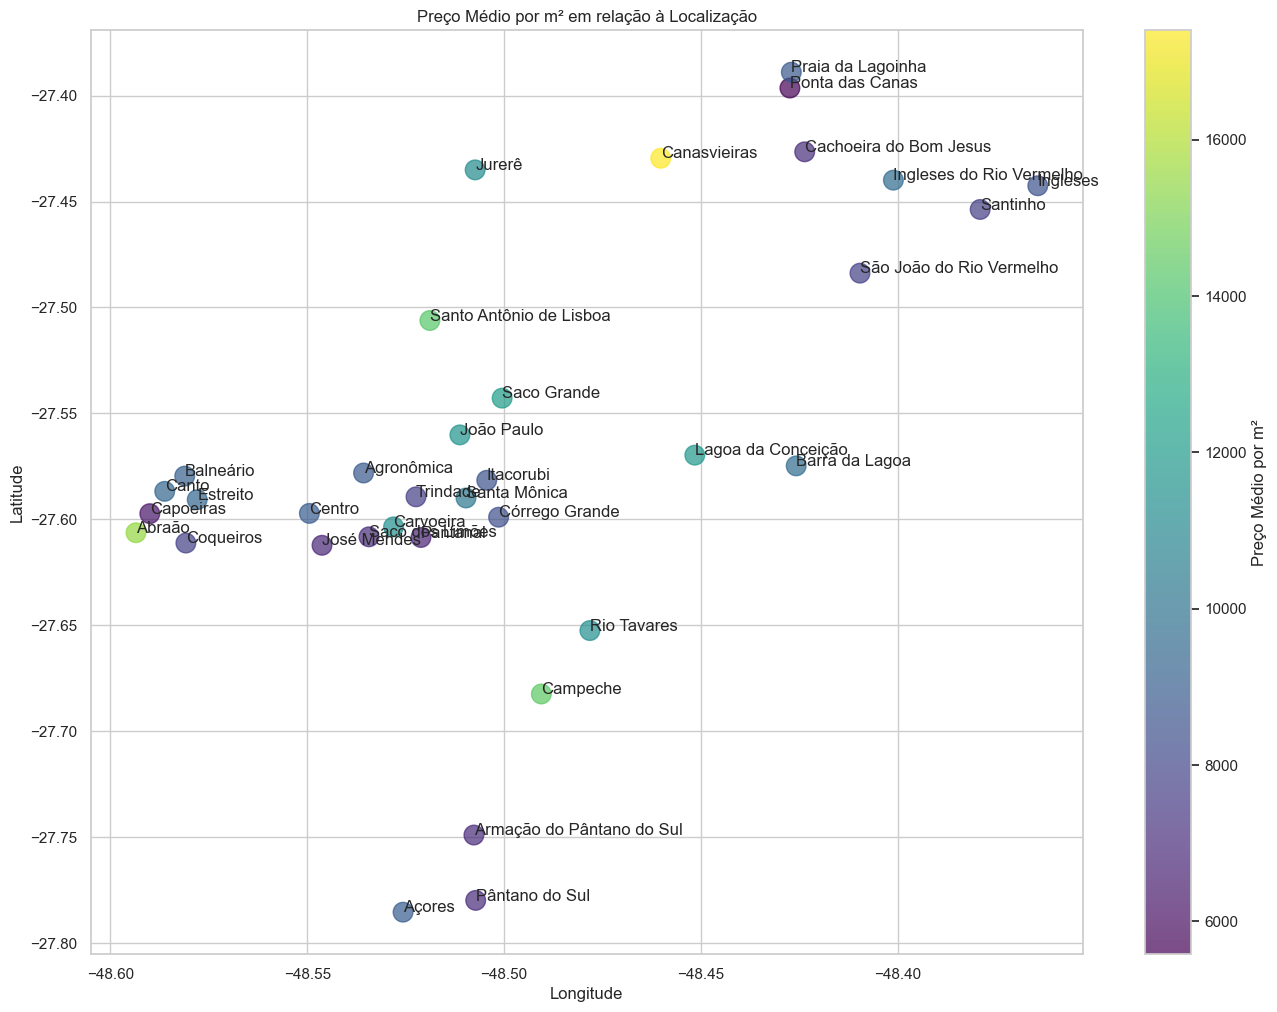

In [63]:
plt.figure(figsize=(16, 12))  


scatter = plt.scatter(
    data2cor['bairro_longitude'],  
    data2cor['bairro_latitude'],  
    c=data2cor['preçom2pbairro'],  
    cmap='viridis',  
    s=200,  
    alpha=0.7  
)


plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Preço Médio por m² em relação à Localização')


plt.colorbar(scatter, label='Preço Médio por m²')


for i, txt in enumerate(data2cor.index):
    plt.annotate(txt, (data2cor['bairro_longitude'].iloc[i], data2cor['bairro_latitude'].iloc[i]) , fontsize = 12)


plt.show()

Vamos aproveitar o cluster de bairros próximos ao centro formado por Centro, Trindade, Itacorubi, Estreiro, Saco Grande e Agronômica. Esses 6 bairros possuem o maior número de instâncias. Então podemos aplicar o teste de Tukey para verificar se a média desses valores por m² se diferencia.

In [64]:
#os 6 bairros com maiores instâncias
data['bairro'].value_counts().index[:6].values

array(['Centro', 'Trindade', 'Itacorubi', 'Estreito', 'Saco Grande',
       'Agronômica'], dtype=object)

In [65]:
data6bairros = data[data['bairro'].apply(lambda x: x in data['bairro'].value_counts().index[:6].values)]

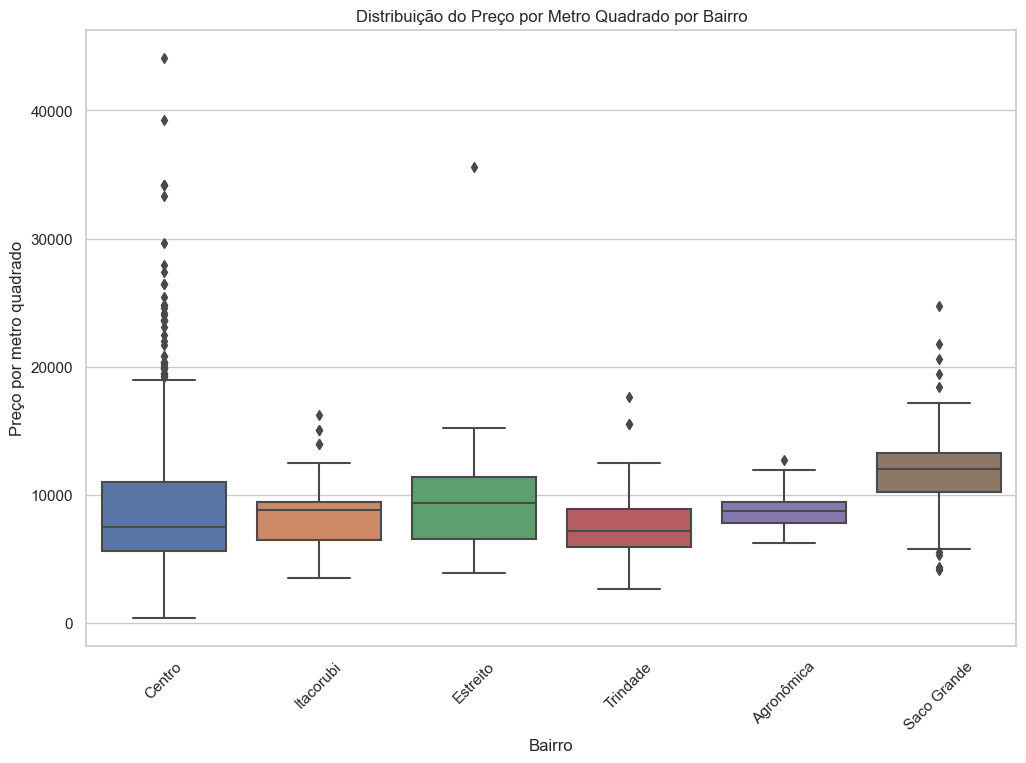

In [66]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='bairro', y='precopm2', data=data6bairros, orient='v')
plt.xlabel('Bairro')
plt.ylabel('Preço por metro quadrado')
plt.title('Distribuição do Preço por Metro Quadrado por Bairro')
plt.xticks(rotation=45)
plt.show()

Os valores do preço do imóvel por m² no centro parecem estar mais dispersados, mas isso pode ser pelo número de instancias. Vamos agora verificar pelo teste de Tukey se os valores médios são estatisticamente diferentes.

# Teste Tukey

In [67]:
f_statistic, p_value = f_oneway(*[group["precopm2"] for name, group in data6bairros.groupby("bairro")])

print("Resultado do Teste ANOVA:")
print("Estatística F:", f_statistic)
print("Valor-p:", p_value)

tukey_result = pairwise_tukeyhsd(data6bairros["precopm2"], data6bairros["bairro"])

print("\nResultado do Teste de Tukey:")
print(tukey_result)

Resultado do Teste ANOVA:
Estatística F: 9.091150344962129
Valor-p: 1.730995101698227e-08

Resultado do Teste de Tukey:
         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
   group1      group2    meandiff  p-adj    lower      upper    reject
----------------------------------------------------------------------
 Agronômica      Centro   151.4673    1.0 -2003.9712  2306.9059  False
 Agronômica    Estreito   604.8027 0.9816 -1851.7536  3061.3591  False
 Agronômica   Itacorubi  -280.1842 0.9995 -2733.5556  2173.1872  False
 Agronômica Saco Grande   3264.338  0.004   698.4402  5830.2358   True
 Agronômica    Trindade -1059.2017 0.8186  -3503.352  1384.9486  False
     Centro    Estreito   453.3354 0.9338  -911.9395  1818.6103  False
     Centro   Itacorubi  -431.6515 0.9449 -1791.1872   927.8842  False
     Centro Saco Grande  3112.8707    0.0   1559.443  4666.2984   True
     Centro    Trindade  -1210.669 0.1046 -2553.4932   132.1552  False
   Estreito   Itacorubi  -88

O p valor relacionado a estatistica F indica que há diferença intra grupo de valores

Já o p-adj do bairro Saco Grande contra todos os outros bairros indica essa diferença, ou seja, para o bairro do Saco Grande podemos rejeitar a hipótese nula de valores médios iguais

# Regressão

Vamos fazer uma regressão linear dos preço dos imóveis em relação m² e bairro.

As instancias do bairros de florianópolis analisados serão Centro, Trindade, Itacorubi, Estreito, Saco Grande e Agronômica

Como pelo teste de Tukey o valor médio dos preços referente ao Saco Grande foi diferente dos outros bairros, criarei uma variável dummy indicando esse bairro

Não usarei coeficiente de intercepto porque não há sentido em um imóvel com zero m²

Serão 1134 instancias no total.

Não usarei o número de salas, banheiro e garagens por ausência de dados e porque a variável m² estar altamente correlacionada com essas variáveis

In [68]:
data6b =  data6bairros.drop(['condominio' , 'salas' , 'banheiros' , 'garagens' , 'precopm2' , 'latitude' , 'longitude' , 'endereço' , 'descrição' , 'bairro_latitude' , 'bairro_longitude'], axis=1)

In [69]:
data6b

,m2,preço,bairro
0,38,650000,Centro
1,30,244800,Itacorubi
2,29,160000,Estreito
3,745,2100000,Trindade
4,27,186000,Trindade
...,...,...,...
1409,59,645657,Centro
1410,33,250000,Centro
1411,295,1600000,Centro
1412,41,488246,Centro


In [70]:
data6b.iloc[:,:-1].corr()

,m2,preço
m2,1.000,0.810
preço,0.810,1.000


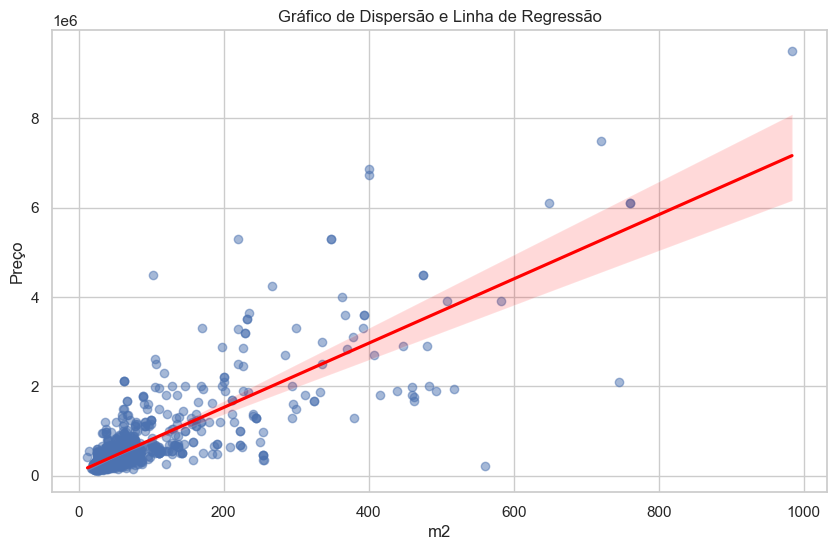

In [71]:
plt.figure(figsize=(10, 6))
sns.regplot(x='m2', y='preço', data=data6b, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Gráfico de Dispersão e Linha de Regressão')
plt.xlabel('m2')
plt.ylabel('Preço')
plt.grid(True)
plt.show()

Há indicios de uma forte correlação entre o m² e o preço, uma correlação de 0.81

In [72]:
data6b

,m2,preço,bairro
0,38,650000,Centro
1,30,244800,Itacorubi
2,29,160000,Estreito
3,745,2100000,Trindade
4,27,186000,Trindade
...,...,...,...
1409,59,645657,Centro
1410,33,250000,Centro
1411,295,1600000,Centro
1412,41,488246,Centro


In [73]:
data6b['Saco_Grande_dummy'] = (data6b['bairro'] == 'Saco Grande').astype(int)
data6b.drop('bairro', axis=1, inplace=True)

In [74]:
import statsmodels.api as sm
X = data6b[['m2', 'Saco_Grande_dummy']]
y = data6b['preço']
model = sm.OLS(y, X)
results = model.fit()
residuals = results.resid
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  preço   R-squared (uncentered):                   0.784
Model:                            OLS   Adj. R-squared (uncentered):              0.783
Method:                 Least Squares   F-statistic:                              2052.
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        17:06:51   Log-Likelihood:                         -16461.
No. Observations:                1134   AIC:                                  3.293e+04
Df Residuals:                    1132   BIC:                                  3.294e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

O r² da regressão apresenta um ajuste de 78%

Todas variáveis independentes possuem um valor estatisticamente significativo, p < 0.05

Um imóvel no Saco Grande é, em média, 356300 mais caro que nos outros bairros

para cada m² a mais, o preço do imóvel sobe cerca de 7499 reais

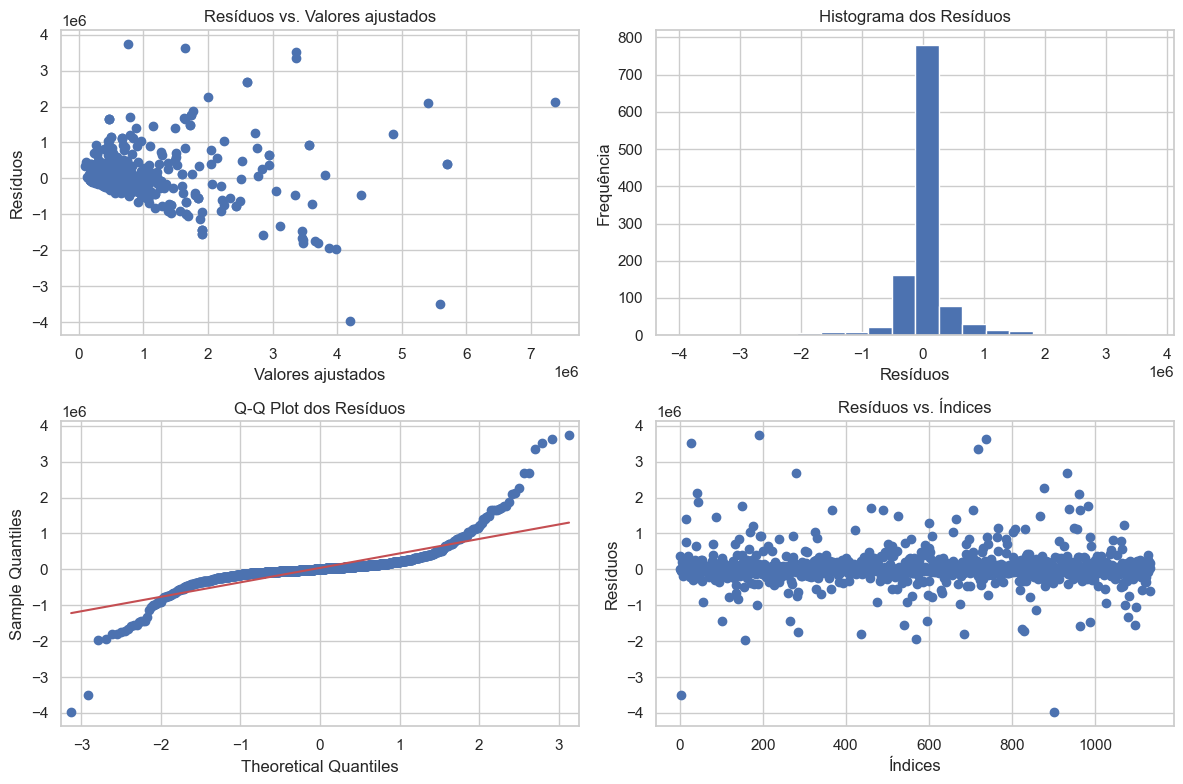

Teste de Shapiro-Wilk para normalidade dos resíduos:
Estatística de teste: 0.6890815496444702
Valor p: 2.1928919668219062e-41

Teste de Bartlett para homocedasticidade dos resíduos:
Estatística de teste: 168.51835111145374
Valor p: 1.558768033226557e-38


In [75]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].scatter(results.fittedvalues, residuals)
axs[0, 0].set_xlabel('Valores ajustados')
axs[0, 0].set_ylabel('Resíduos')
axs[0, 0].set_title('Resíduos vs. Valores ajustados')

axs[0, 1].hist(residuals, bins=20)
axs[0, 1].set_xlabel('Resíduos')
axs[0, 1].set_ylabel('Frequência')
axs[0, 1].set_title('Histograma dos Resíduos')

sm.qqplot(residuals, line='r', ax=axs[1, 0])
axs[1, 0].set_title('Q-Q Plot dos Resíduos')

axs[1, 1].scatter(range(len(residuals)), residuals)
axs[1, 1].set_xlabel('Índices')
axs[1, 1].set_ylabel('Resíduos')
axs[1, 1].set_title('Resíduos vs. Índices')

plt.tight_layout()
plt.show()

shapiro_test = stats.shapiro(residuals)
bartlett_test = stats.bartlett(residuals, results.fittedvalues)

print("Teste de Shapiro-Wilk para normalidade dos resíduos:")
print("Estatística de teste:", shapiro_test[0])
print("Valor p:", shapiro_test[1])

print("\nTeste de Bartlett para homocedasticidade dos resíduos:")
print("Estatística de teste:", bartlett_test[0])
print("Valor p:", bartlett_test[1])

No gráfico de resíduos em relação aos valores ajustados parece haver uma tendência nos resíduos quando os valores aumentam.

No gráfico de histograma dos resíduos parece haver uma forte tendência em relação a um valor central.

No gráfico de QQ mostra que há mais dados localizados nas extremidades da distribuição e menos dados no centro da distribuição, em comparação com a distribuição normal.

Pelos p valores encontrados tanto para o teste de shapiro como de barlett podemos recusar a hipótese nula que os dados seguem uma dsitribuição normal e que os resíduos são hoocedasticos.

## Resalvas sobre a regressão

O r² pode ser afetado pela não normalidade e não homocedasticidade dos resíduos.

A eficiência dos parametros podem ser afetada por esses motivos também.

O teste t também assume que as variáveis são normalmente distribuidas, mesmo que esse teste seja robusto para uma número grande de instâncias pelo teorema central do limite.

Uma alternativa seria usar de métodos de regressão robusta ou até transformação das variáveis.

Como o intuito dessa exploração não é a regressão, deixarei como estar por síntese